In [2]:
import os
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.tokenize import word_tokenize

import html 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\isp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  Random Under Sampling 

In [3]:
## Data Loading 

df = pd.read_csv("C:/Users/isp/Downloads/Capstone-Project-main/Capstone-Project-main/Data Folder/clean_df")
df.head(5)

,Unnamed: 0,text,fraudulent,clean_text,token
0,0,"Marketing Intern We're Food52, and we've creat...",0,market intern be food weve create groundbreaki...,"['market', 'intern', 'be', 'food', 'weve', 'cr..."
1,1,Customer Service - Cloud Video Production 90 S...,0,customer service cloud video production second...,"['customer', 'service', 'cloud', 'video', 'pro..."
2,2,Commissioning Machinery Assistant (CMA) Valor ...,0,commission machinery assistant cma valor servi...,"['commission', 'machinery', 'assistant', 'cma'..."
3,3,Account Executive - Washington DC Our passion ...,0,account executive washington dc passion improv...,"['account', 'executive', 'washington', 'dc', '..."
4,4,Bill Review Manager SpotSource Solutions LLC i...,0,bill review manager spotsource solutions llc g...,"['bill', 'review', 'manager', 'spotsource', 's..."


In [4]:
X=df.drop(['fraudulent','text', 'token','Unnamed: 0'], axis=1)
y=df['fraudulent']

type(X)

pandas.core.frame.DataFrame

In [5]:
X.shape

(17880, 1)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = set(nltk.corpus.stopwords.words('english'))



tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(X["clean_text"])
tfidf_text_vectors.shape

(17880, 18370)

In [9]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

under_sample = RandomUnderSampler(sampling_strategy = 'majority')

X_tf, y_tf= under_sample.fit_resample(tfidf_text_vectors, y)



X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf,y_tf, test_size=0.20,random_state=0,stratify=y_tf)


In [10]:
y_tf.value_counts()

fraudulent
0    866
1    866
Name: count, dtype: int64


# Modeling 

## Logistic Regression tfidf

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_tf, y_train_tf)



LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       174
           1       0.93      0.90      0.91       173

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



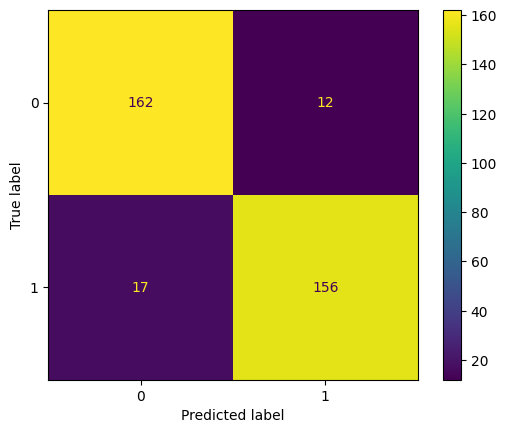

In [12]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



lr_predict = logreg.predict(X_test_tf)

print(classification_report(y_test_tf, lr_predict))


cm_lr =confusion_matrix(y_test_tf, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()




In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy", accuracy_score(y_test_tf, lr_predict))


print("F1 Score", f1_score(y_test_tf, lr_predict))
print("Precision", precision_score(y_test_tf, lr_predict))
print("Recall", recall_score(y_test_tf, lr_predict))




Accuracy 0.9164265129682997
F1 Score 0.9149560117302052
Precision 0.9285714285714286
Recall 0.9017341040462428


## Random Forest tf-idf

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)



RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       174
           1       0.89      0.92      0.91       173

    accuracy                           0.90       347
   macro avg       0.91      0.90      0.90       347
weighted avg       0.91      0.90      0.90       347



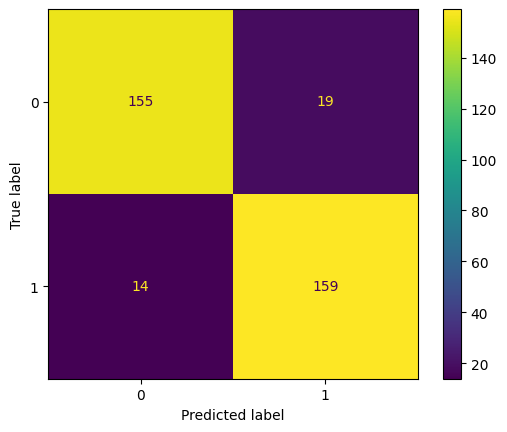

In [15]:

rf_predict = rf.predict(X_test_tf)

print(classification_report(y_test_tf, rf_predict))

cm_rf =confusion_matrix(y_test_tf, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()





In [16]:

print("Accuracy", accuracy_score(y_test_tf, rf_predict))


print("F1 Score", f1_score(y_test_tf, rf_predict))
print("Precision", precision_score(y_test_tf, rf_predict))
print("Recall", recall_score(y_test_tf, rf_predict))





Accuracy 0.9048991354466859
F1 Score 0.905982905982906
Precision 0.8932584269662921
Recall 0.9190751445086706


## Naive Bayes tf-idf

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

NB = MultinomialNB()
NB.fit(X_train_tf, y_train_tf)



MultinomialNB()

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       174
           1       0.87      0.90      0.88       173

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347



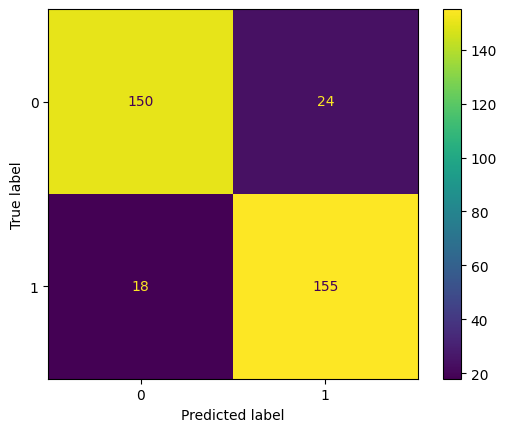

In [18]:

nb_predict = NB.predict(X_test_tf)

print(classification_report(y_test_tf, nb_predict))

cm_nb =confusion_matrix(y_test_tf, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()



In [19]:

print("Accuracy", accuracy_score(y_test_tf, nb_predict))


print("F1 Score", f1_score(y_test_tf, nb_predict))
print("Precision", precision_score(y_test_tf, nb_predict))
print("Recall", recall_score(y_test_tf, nb_predict))





Accuracy 0.8789625360230547
F1 Score 0.8806818181818182
Precision 0.8659217877094972
Recall 0.8959537572254336


## Multi Layer Perceptron tf-idf

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_tf,y_train_tf)



MLPClassifier(hidden_layer_sizes=(100, 50, 2), max_iter=1000, random_state=5)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       174
           1       0.93      0.93      0.93       173

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.93       347
weighted avg       0.93      0.93      0.93       347



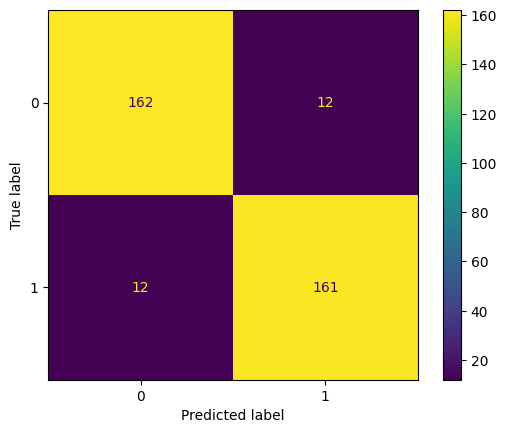

In [21]:
mlp_predict = mlp.predict(X_test_tf)

print(classification_report(y_test_tf, mlp_predict))

cm_mlp =confusion_matrix(y_test_tf, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()






In [22]:

print("Accuracy", accuracy_score(y_test_tf, mlp_predict))


print("F1 Score", f1_score(y_test_tf, mlp_predict))
print("Precision", precision_score(y_test_tf, mlp_predict))
print("Recall", recall_score(y_test_tf, mlp_predict))




Accuracy 0.930835734870317
F1 Score 0.930635838150289
Precision 0.930635838150289
Recall 0.930635838150289


## KNN tf-idf

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_tf,y_train_tf)



KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       174
           1       0.86      0.89      0.88       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



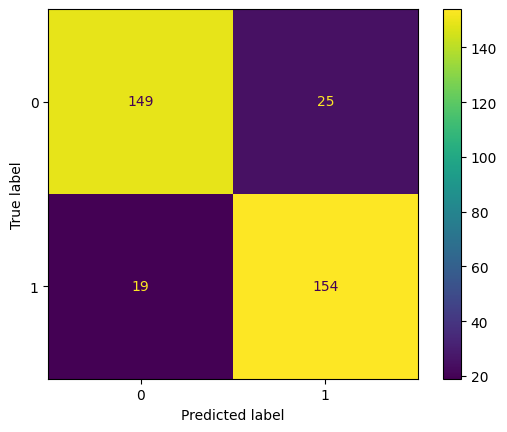

In [24]:

knn_predict = knn.predict(X_test_tf)

print(classification_report(y_test_tf, knn_predict))


cm_knn =confusion_matrix(y_test_tf, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()



In [25]:

print("Accuracy", accuracy_score(y_test_tf, knn_predict))


print("F1 Score", f1_score(y_test_tf, knn_predict))
print("Precision", precision_score(y_test_tf, knn_predict))
print("Recall", recall_score(y_test_tf, knn_predict))



Accuracy 0.8731988472622478
F1 Score 0.875
Precision 0.8603351955307262
Recall 0.8901734104046243


## Support Vector Machine tf-idf

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', gamma = 'auto' )

svc.fit(X_train_tf, y_train_tf)



SVC(gamma='auto', kernel='linear')

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       174
           1       0.93      0.91      0.92       173

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



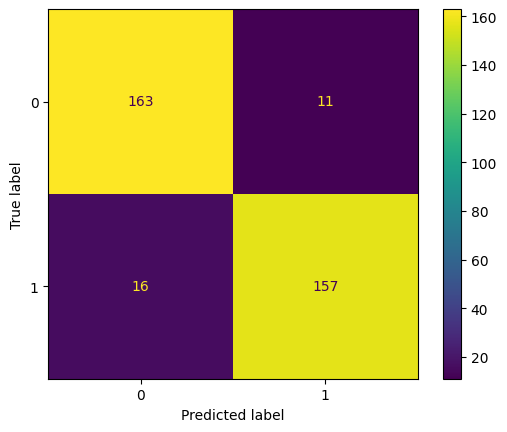

In [27]:

svm_predict = svc.predict(X_test_tf)

print(classification_report(y_test_tf, svm_predict))

cm_svm =confusion_matrix(y_test_tf, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()




In [28]:

print("Accuracy", accuracy_score(y_test_tf, svm_predict))


print("F1 Score", f1_score(y_test_tf, svm_predict))
print("Precision", precision_score(y_test_tf, svm_predict))
print("Recall", recall_score(y_test_tf, svm_predict))





Accuracy 0.9221902017291066
F1 Score 0.9208211143695014
Precision 0.9345238095238095
Recall 0.9075144508670521


## AUC  Curve  of TF-IDF Vectorizer


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()
plt.title("AUC Curve of Undersample Data with TF-IDF Vectorizer")

#fit logistic regression model and plot ROC curve
lr = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_tf, y_train_tf)
y_pred_lr = lr.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_tf, y_train_tf)
y_pred_svc = svc.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_tf, y_train_tf)
y_pred_knn = knn.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)
y_pred_rf = rf.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_tf,y_train_tf)
y_pred_mlp = mlp.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))



nb = MultinomialNB()
nb.fit(X_train_tf, y_train_tf)
y_pred_nb = nb.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()





ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\isp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\__init__.py)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       174
           1       0.90      0.92      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347



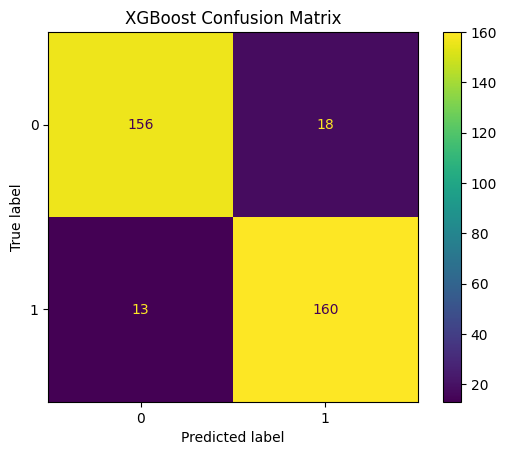

Accuracy: 0.9106628242074928
F1 Score: 0.9116809116809117
Precision: 0.898876404494382
Recall: 0.9248554913294798


In [30]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize and train the model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tf, y_train_tf)

# Predict
xgb_predict = xgb.predict(X_test_tf)

# Classification report
print(classification_report(y_test_tf, xgb_predict))

# Confusion matrix
cm_xgb = confusion_matrix(y_test_tf, xgb_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

# Other metrics
print("Accuracy:", accuracy_score(y_test_tf, xgb_predict))
print("F1 Score:", f1_score(y_test_tf, xgb_predict))
print("Precision:", precision_score(y_test_tf, xgb_predict))
print("Recall:", recall_score(y_test_tf, xgb_predict))

In [31]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("C:/Users/isp/Downloads/Capstone-Project-main/Capstone-Project-main/Data Folder/clean_df")

# Features and labels
X = df['clean_text']
y = df['fraudulent']  # This should be binary: 0 (real), 1 (fake)

# Tokenization
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'tensorflow'